<a href="https://colab.research.google.com/github/FGalvao77/Conhecendo-o-classificador-SVM-e-kernel-RBF/blob/main/Conhecendo_o_classificador_SVM_e_kernel_RBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificador Support Vector Machines (SVM) e kernel Radial Basis Function (RBF)**

---



**Máquina de vetores de suporte**

Uma **máquina de vetores** de suporte (SVM, do inglês: support-vector machine) é um conceito na _ciência da computação_ para um conjunto de métodos de [aprendizado supervisionado](https://pt.wikipedia.org/wiki/Ci%C3%AAncia_da_computa%C3%A7%C3%A3o0) que analisam os dados e reconhecem padrões, usado para classificação e análise de [regressão](https://pt.wikipedia.org/wiki/Regress%C3%A3o_(estat%C3%ADstica)). O SVM padrão toma como entrada um conjunto de dados e prediz, para cada entrada dada, qual de duas possíveis classes a entrada faz parte, o que faz do SVM um classificador linear binário não probabilístico. Dados um conjunto de exemplos de treinamento, cada um marcado como pertencente a uma de duas categorias, um [algoritmo](https://pt.wikipedia.org/wiki/Algoritmo) de treinamento do SVM constrói um modelo que atribui novos exemplos a uma categoria ou outra. Um modelo SVM é uma representação de exemplos como pontos no espaço, mapeados de maneira que os exemplos de cada categoria sejam divididos por um espaço claro que seja tão amplo quanto possível. Os novos exemplos são então mapeados no mesmo espaço e preditos como pertencentes a uma categoria baseados em qual o lado do espaço eles são colocados.

Em outras palavras, o que uma SVM faz é encontrar uma linha de separação, mais comumente chamada de [hiperplano](https://pt.wikipedia.org/wiki/Hiperplano) entre dados de duas classes. Essa linha busca maximizar a distância entre os pontos mais próximos em relação a cada uma das classes, ver imagem:

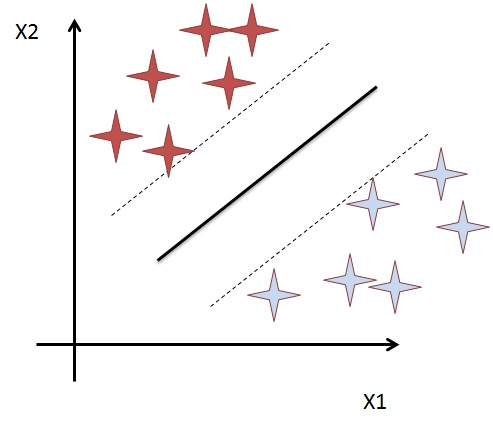

Essa distância entre o hiperplano e o primeiro ponto de cada classe costuma ser chamada de margem. A SVM coloca em primeiro lugar a classificação das classes, definindo assim cada ponto pertencente a cada uma das classes, e em seguida maximiza a margem. Ou seja, ela primeiro classifica as classes corretamente e depois em função dessa restrição define a distância entre as margens.

**Algumas características:**

- Em caso de [outlier](https://pt.wikipedia.org/wiki/Outlier) a SVM busca a melhor forma possível de classificação e, se necessário, desconsidera o outlier;
- Funciona muito bem em domínios complicados, em que existe uma clara margem de separação;
- Não funciona bem em conjuntos de dados muito grandes, pois exige [inversão de matriz](https://pt.wikipedia.org/wiki/Matriz_inversa) - aumentando a [complexidade computacional](https://pt.wikipedia.org/wiki/Complexidade_computacional_de_opera%C3%A7%C3%B5es_matem%C3%A1ticas) com até o cubo do volume de dados;
- Não funciona bem em conjunto de dados com grande quantidade de ruídos;
Se as classes estiverem muito sobrepostas deve-se utilizar apenas evidências independentes (devido ao fato de não ser muito bom com dados com muitos ruídos);

- Fonte: https://pt.wikipedia.org/wiki/M%C3%A1quina_de_vetores_de_suporte

_Support Vector Machine_ (SVMs) são usados ​​com mais frequência para resolver problemas de **classificação**, que se enquadram na categoria de aprendizado de máquina supervisionado. No entanto, com pequenas adaptações, os SVMs também podem ser usados ​​para outros tipos de problemas, como:

- `Clustering`: (aprendizagem não supervisionada) através do uso do algoritmo Support Vector Clustering
- `Regressão`: (aprendizagem supervisionada) através do uso do algoritmo de regressão de vetores de suporte (SVR)

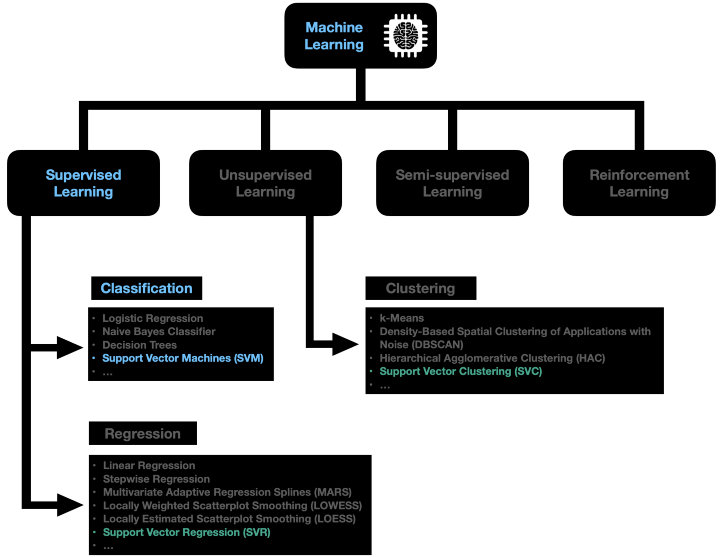

Classificação SVM dentro da família de algoritmos de aprendizado de máquina.

**Entendendo com mais detalhes o funcionamento do `SVM`**

Vamos supor que temos um conjunto de pontos que pertencem a duas classes distintas e, queremos separar essas duas classes de uma forma que nos permita atribuir corretamente quaisquer novos pontos futuros para uma classe ou outra.

O algoritmo SVM tenta encontrar um _hiperplano_ que separe essas duas classes com a maior margem possível. Se as classes forem totalmente separáveis ​​linearmente, uma **margem rígida** pode ser usada. Caso contrário, requer uma **margem suave**.

Os pontos que terminam nas margens são conhecidos como `vetores de suporte`.

Para melhor entendimento, vamos visualizar os exemplos nas ilustrações abaixo.

**Margem dura**

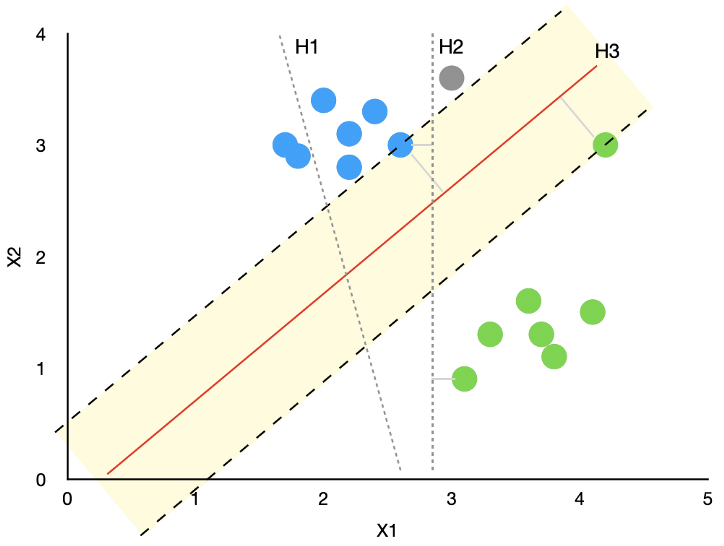

Separando as duas classes de pontos com o algoritmo SVM. Cenário de margem dura.

- O hiperplano denominado `"H1"` não pode separar com precisão as duas classes; portanto, não é uma solução viável para nosso problema.
- O hiperplano `"H2"` separa as classes corretamente. No entanto, a margem entre o hiperplano e os pontos azuis e verdes mais próximos é pequena. Portanto, há uma grande chance de classificar incorretamente quaisquer novos pontos futuros. Por exemplo, o novo ponto cinza (x1 = 3, x2 = 3,6) seria atribuído à classe verde pelo algoritmo quando fosse óbvio que deveria pertencer à classe azul.
- Finalmente, o hiperplano `"H3"` separa as duas classes corretamente e com a maior margem possível (área sombreada em amarelo). Solução encontrada!

**Margem suave**

Às vezes, pode não ser impossível separar as duas classes perfeitamente. Em tais cenários, uma `margem suave` é usada onde alguns pontos podem ser classificados incorretamente ou cair dentro da margem (área sombreada em amarelo). É aqui que entra o valor "folga", denotado pela letra grega ξ (xi, pronuncia-se "ksi").

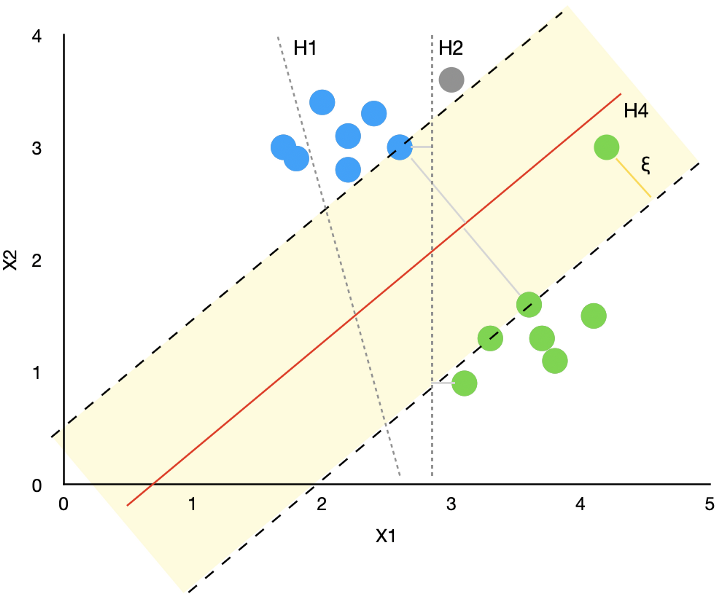

Separando as duas classes de pontos com o algoritmo SVM. Cenário de margem suave.

Usando este exemplo, podemos ver que o hiperplano `"H4"` trata o ponto verde dentro da margem como um outlier. Assim, os vetores de suporte são os dois pontos verdes mais próximos do grupo principal de pontos verdes. Isso permite que exista uma margem maior, aumentando a robustez do modelo.

Observe que o algoritmo permite que você controle o quanto você se preocupa com classificações incorretas (e pontos dentro da margem) ajustando o hiperparâmetro C. Basicamente, C atua como um peso atribuído a ξ. Um C baixo torna a superfície de decisão mais suave (mais robusta), enquanto um C alto visa classificar todos os exemplos de treinamento corretamente, produzindo um ajuste mais próximo aos dados de treinamento, mas tornando-os menos robustos.

_Cuidado, embora a definição de um valor alto para C provavelmente leve a um melhor desempenho do modelo nos dados de treinamento, há um alto risco de `overfitting do modelo`, produzindo resultados insatisfatórios nos dados de teste._

**Truque do kernel**

A explicação acima do SVM abrangeu exemplos em que as classes azul e verde são linearmente separáveis. No entanto, e se quiséssemos aplicar SVMs a problemas não lineares? Como faríamos isso?

É aqui que entra o truque do kernel. Um _kernel_ é uma função que pega o problema não linear original e o transforma em um problema linear dentro do espaço de dimensão superior. Para explicar esse truque, vamos observar o exemplo abaixo.

Suponha que você tenha duas classes - vermelha e preta, conforme mostrado na figura abaixo.

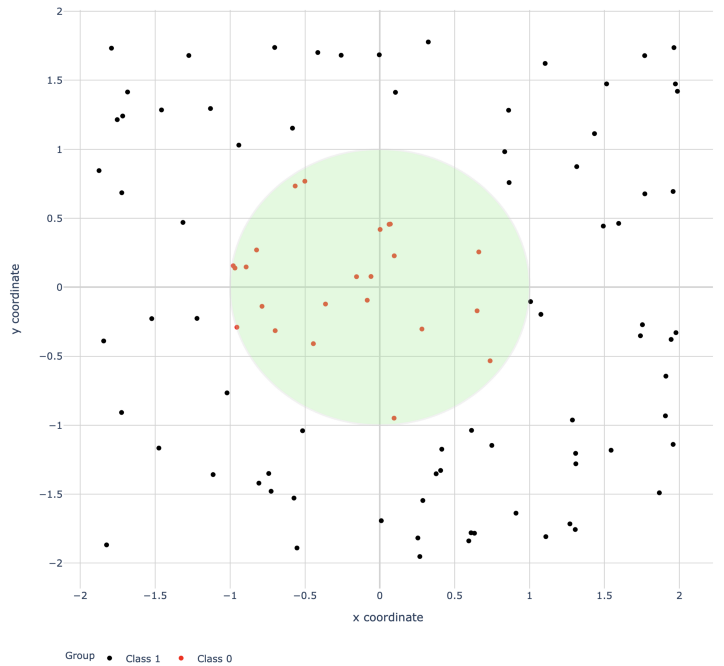

Dados bidimensionais originais.

Como você pode ver, os pontos vermelhos e pretos não são linearmente separáveis, pois não podemos traçar uma linha que colocaria essas duas classes em lados diferentes dessa linha. No entanto, podemos separá-los desenhando um círculo com todos os pontos vermelhos dentro dele e os pontos pretos fora dele.

**Como transformar esse problema em um problema linear?**

Vamos adicionar uma terceira dimensão e torná-la uma soma dos valores quadrados de x e y.

$ z = x² + y² $

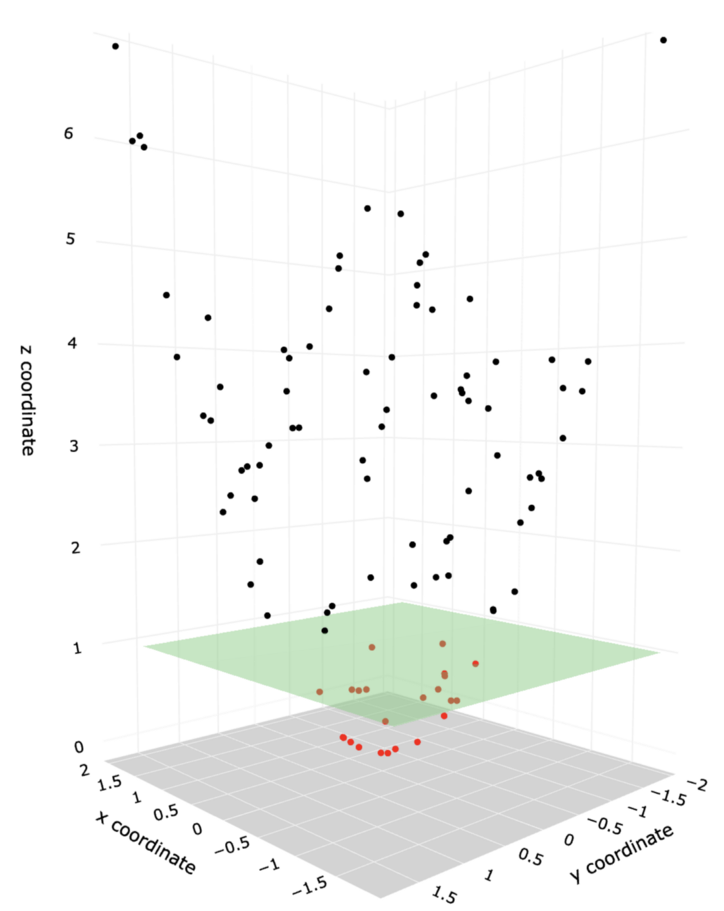

Dados transformados usando um truque do kernel. Classes de vermelho e preto agora são linearmente separáveis.

**Kernel da função de base radial (RBF) e exemplos de Python**

RBF é o kernel padrão usado no algoritmo de classificação SVM do sklearn e pode ser descrito com a seguinte fórmula:

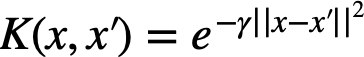

onde gama pode ser definida manualmente e deve ser> 0. O valor padrão para gama no algoritmo de classificação SVM do sklearn é:

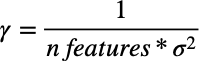

Resumidamente:

$ ||x - x'||² $  is the squared Euclidean distance between two feature vectors (2 points).

Gamma is a scalar that defines how much influence a single training example (point) has.

**Aplicação prática**

Usaremos os seguintes dados e bibliotecas:

- Dados de jogos de xadrez do [Kaggle](https://www.kaggle.com/datasnaek/chess)
- Biblioteca Scikit-learn para dividir os dados em amostras de teste de trem , construção de modelos de classificação 
- SVM e avaliação de modelo
- Plotly para visualizações de dados
- Pandas e Numpy para manipulação de dados

In [22]:
# biblioteca para ignorar mensagens de alerta
import warnings
warnings.filterwarnings('ignore')

In [1]:
# biblioteca utilizada para carregar os dados para o google colab
from google.colab import files  
uploaded = files.upload()

Saving games.csv to games.csv


In [2]:
!ls

games.csv  sample_data


In [3]:
!head games.csv

id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
TZJHLljE,FALSE,1.50421E+12,1.50421E+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5 Bf4,D10,Slav Defense: Exchange Variation,5
l1NXvwaE,TRUE,1.50413E+12,1.50413E+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6 Qe5+ Nxe5 c4 Bb4+,B00,Nimzowitsch Defense: Kennedy Variation,4
mIICvQHh,TRUE,1.50413E+12,1.50413E+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc6 bxc6 Ra6 Nc4 a4 c3 a3 Nxa3 Rxa3 Rxa3 c4 dxc4 d5 cxd5 Qxd5 exd5 Be6 Ra8+ Ke7 Bc5+ Kf6 Bxf8 Kg6 Bxg7 Kxg7 dxe6 Kh6 exf7 Nf6 Rxh8 Nh5 Bxh5 Kg5 Rxh7 Kf5 Qf3+ Ke6 Bg4+ Kd6 Rh6+ Kc5 Qe3+ Kb5 c4+ Kb4 Qc3+ Ka4 Bd1#,C20,King's Pawn Game: Leonardis Variation,3
kWKvrqYL,TRUE,1.50411E+12,1.50411E+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009

In [19]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('games.csv')
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [8]:
df = pd.read_csv('games.csv', encoding='UTF-8')
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


Observe que também criamos algumas novas variáveis ​​para usarmos na modelagem.

In [33]:
# diferença entre "'white_rating" e "black_rating" - variável independente
df['rating_difference'] = df['white_rating'] - df['black_rating']

In [34]:
# as "white" ganham "flag" (1 = vitória vs. 0 = não-vitória) - variável dependente (alvo)
df['white_win'] = df['winner'].apply(lambda x: 1 if x == 'white' else 0)

In [35]:
# imprimindo algumas colunas
df.iloc[:, [0,1,5,6,8,9,10,11,13,16,17]]

,id,rated,victory_status,winner,white_id,white_rating,black_id,black_rating,opening_eco,rating_difference,white_win
0,TZJHLljE,False,outoftime,white,bourgris,1500,a-00,1191,D10,309,1
1,l1NXvwaE,True,resign,black,a-00,1322,skinnerua,1261,B00,61,0
2,mIICvQHh,True,mate,white,ischia,1496,a-00,1500,C20,-4,1
3,kWKvrqYL,True,mate,white,daniamurashov,1439,adivanov2009,1454,D02,-15,1
4,9tXo1AUZ,True,mate,white,nik221107,1523,adivanov2009,1469,C41,54,1
...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,resign,white,belcolt,1691,jamboger,1220,A80,471,1
20054,WSJDhbPl,True,mate,black,jamboger,1233,farrukhasomiddinov,1196,A41,37,0
20055,yrAas0Kj,True,mate,white,jamboger,1219,schaaksmurf3,1286,D00,-67,1
20056,b0v4tRyF,True,resign,white,marcodisogno,1360,jamboger,1227,B07,133,1


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

import plotly.express as px
import plotly.graph_objects as go

Agora, vamos criar algumas funções para reutilizar ao construir modelos diferentes e plotar os resultados.

Esta primeira função irá dividir os dados em treinar e testar amostras, ajustar o modelo, prever o resultado em um conjunto de teste e gerar métricas de avaliação de desempenho do modelo.

In [37]:
def fitting(X, y, C, gamma):

    # criando as amostras de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # treinando o modelo
    # observe, kernels disponíveis: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘pré-computado’}, default = ’rbf’
    model = SVC(kernel='rbf', probability=True, C=C, gamma=gamma)
    clf = model.fit(X_train, y_train)

    # prevendo os rótulos de classe dos dados de treinamento
    pred_labels_tr = model.predict(X_train)

    # prevendo os rótulo de classe dos dados de teste
    pred_labels_te = model.predict(X_test)

    # usando o método de "scoe" para obter a precisão do modelo
    print('----- Evaluation on Test Data | Avaliação de dados de teste -----')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)

    # visualizando o relatório de classificação para avaliar o modelo
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')

    print('----- Evaluation on Training Data | Avaliação de dados de treinamento -----')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)

    # visualizando o relatório de classificação para avaliar o modelo
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    
    # retornando os dados relevantes para a plotagem do gráfico
    return X_train, X_test, y_train, y_test, clf

A função a seguir desenhará um gráfico de dispersão Plotly 3D com os dados de teste e a superfície de previsão do modelo

In [39]:
def Plot_3D(X, X_test, y_test, clf):
            
    # especificando o tamanho da malha a ser usada
    mesh_size = 5
    margin = 1

    # criando uma grade de malha na qual executaremos nosso modelo
    x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
    y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    xx, yy = np.meshgrid(xrange, yrange)
            
    # calculando as previsões na grade
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # criando um gráfico de dispersão 3D com previsões
    fig = px.scatter_3d(x=X_test['rating_difference'], y=X_test['turns'], z=y_test, 
                     opacity=0.8, color_discrete_sequence=['black'])

    # definindo o título e as cores da figura
    fig.update_layout(#title_text='Scatter 3D Plot com SVM Prediction Surface',
                      paper_bgcolor = 'white',
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0', 
                                              )))
    # atualizando o tamanho do marcador
    fig.update_traces(marker=dict(size=1))

    # adicionando o plano de previsão
    fig.add_traces(go.Surface(x=xrange, y=yrange, z=Z, name='SVM Prediction',
                              colorscale='RdBu', showscale=False, 
                              contours = {"z": {"show": True, "start": 0.2, "end": 0.8, "size": 0.05}}))
    
    fig.show();

**Construir um modelo com valores padrão para C e Gamma**

Vamos construir nosso primeiro modelo SVM usando os campos 'rating_difference' e 'turn' como nossas variáveis ​​independentes (atributos / preditores) e o sinalizador 'white_win' como nosso alvo.

Note que estamos trapaceando aqui, já que o número total de movimentos só seria conhecido após a partida. Portanto, 'turnos' não estariam disponíveis se quiséssemos gerar a previsão do modelo antes do início da partida. No entanto, isso é apenas para fins ilustrativos; portanto, vamos usá-lo nos exemplos abaixo.

Como estamos usando nossa função de 'ajuste' definida anteriormente, o código é curto.

In [40]:
# instanciano os dados para modelagem
X = df[['rating_difference', 'turns']]
y = df['white_win'].values

# treinando o modelo e exibindo os resultados
X_train, X_test, y_train, y_test, clf = fitting(X, y, 1, 'scale')

----- Evaluation on Test Data | Avaliação de dados de teste -----
Accuracy Score:  0.6530408773678963
              precision    recall  f1-score   support

           0       0.64      0.70      0.67      2024
           1       0.66      0.60      0.63      1988

    accuracy                           0.65      4012
   macro avg       0.65      0.65      0.65      4012
weighted avg       0.65      0.65      0.65      4012

--------------------------------------------------------
----- Evaluation on Training Data | Avaliação de dados de treinamento -----
Accuracy Score:  0.6468901907017325
              precision    recall  f1-score   support

           0       0.64      0.68      0.66      8033
           1       0.66      0.62      0.64      8013

    accuracy                           0.65     16046
   macro avg       0.65      0.65      0.65     16046
weighted avg       0.65      0.65      0.65     16046

--------------------------------------------------------


Podemos ver que o desempenho do modelo nos dados de teste é semelhante ao dos dados de treinamento, o que garante que o modelo pode generalizar bem usando os hiperparâmetros padrão.

Vamos agora visualizar a previsão simplesmente chamando a função `Plot_3D`.

In [41]:
Plot_3D(X, X_test, y_test, clf)

Embora haja variação local na probabilidade, o limite de decisão fica em torno de x = 0 (ou seja, diferença de classificação = 0), pois é onde a probabilidade cruza o limite de p = 0,5.

**Modelo SVM 2 - Gama = 0,1**

Vamos agora ver o que acontece quando definimos um valor relativamente alto para gama.

In [42]:
# instanciano os dados para modelagem
X = df[['rating_difference', 'turns']]
y = df['white_win'].values

# treinando o modelo e exibindo os resultados
X_train, X_test, y_train, y_test, clf = fitting(X, y, 1, 0.1)

# plotando o gráfico 3D
Plot_3D(X, X_test, y_test, clf)

----- Evaluation on Test Data | Avaliação de dados de teste -----
Accuracy Score:  0.603938185443669
              precision    recall  f1-score   support

           0       0.60      0.64      0.62      2024
           1       0.61      0.57      0.59      1988

    accuracy                           0.60      4012
   macro avg       0.60      0.60      0.60      4012
weighted avg       0.60      0.60      0.60      4012

--------------------------------------------------------
----- Evaluation on Training Data | Avaliação de dados de treinamento -----
Accuracy Score:  0.8003240683036271
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      8033
           1       0.80      0.80      0.80      8013

    accuracy                           0.80     16046
   macro avg       0.80      0.80      0.80     16046
weighted avg       0.80      0.80      0.80     16046

--------------------------------------------------------


Podemos ver que o aumento do gama levou a um melhor desempenho do modelo nos dados de treinamento, mas piorou o desempenho nos dados de teste. O gráfico abaixo nos ajuda a ver exatamente por que isso acontece.

Em vez de ter uma superfície de previsão lisa como antes, agora temos uma muito "pontiaguda". Para entender por que isso acontece, precisamos estudar a função do kernel um pouco mais de perto.

Quando escolhemos gama alta, dizemos à função que os pontos próximos são muito mais importantes para a previsão do que os pontos mais distantes. Conseqüentemente, obtemos esses “picos”, pois a previsão depende muito de pontos individuais dos exemplos de treinamento, e não do que está ao redor deles.

No lado oposto, a redução de gama informa à função que não é apenas o ponto individual, mas também os pontos ao redor dele que importam ao fazer a previsão. Para verificar isso, vejamos outro exemplo com um valor relativamente baixo para gama.

**Modelo SVM 3— Gamma = 0,000001**

Vamos executar novamente as funções.

In [43]:
# instanciano os dados para modelagem
X = df[['rating_difference', 'turns']]
y = df['white_win'].values

# treinando o modelo e exibindo os resultados
X_train, X_test, y_train, y_test, clf = fitting(X, y, 1, 0.000001)

# plotando o gráfico 3D
Plot_3D(X, X_test, y_test, clf)

----- Evaluation on Test Data | Avaliação de dados de teste -----
Accuracy Score:  0.6602691924227319
              precision    recall  f1-score   support

           0       0.65      0.70      0.68      2024
           1       0.67      0.62      0.64      1988

    accuracy                           0.66      4012
   macro avg       0.66      0.66      0.66      4012
weighted avg       0.66      0.66      0.66      4012

--------------------------------------------------------
----- Evaluation on Training Data | Avaliação de dados de treinamento -----
Accuracy Score:  0.6463916240807678
              precision    recall  f1-score   support

           0       0.64      0.67      0.65      8033
           1       0.65      0.62      0.64      8013

    accuracy                           0.65     16046
   macro avg       0.65      0.65      0.65     16046
weighted avg       0.65      0.65      0.65     16046

--------------------------------------------------------


Como esperado, a redução de gama tornou o modelo mais robusto com um aumento no desempenho do modelo nos dados de teste (precisão = 0,66). O gráfico abaixo ilustra o quanto a superfície de previsão se tornou mais lisa depois de atribuir mais influência aos pontos mais distantes.

**Ajustando o hiperparâmetro C**

Não inclui exemplos usando diferentes valores de C porque isso afeta a suavidade do plano de previsão de forma semelhante ao gama, embora seja por razões diferentes. Você pode tentar fazer isso passando um valor como C = 100 para a função de "ajuste" para ver.

**Conclusão**

O algoritmo SVM é poderoso e flexível. Embora eu tenha coberto apenas o uso básico com um dos kernels disponíveis, espero que isso tenha lhe dado uma compreensão do funcionamento interno do SVM e do RBF. 

Isso deve permitir que você explore todas as outras opções sozinho.

**Fontes de pesquisa/apoio:**
- https://scikit-learn.org/stable/modules/svm.html
- https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
- https://www.codigofluente.com.br/aula-08-scikit-learn-maquina-de-vetores-de-suporte/
- https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/